# 머신러닝 - 지도학습

* 지도학습이란 정답을 알려주고 그 정답을 예측하는 기게학습니다.
* 지도학습 알고리즘
  1. 선형회귀분석
  2. 의사결정나무
  3. SVM
  4. KNN
  5. NN

#### 1. 선형회귀분석

##### 1. 선형회귀모델(Linear Regression Model)

w[0]: 0.393906  b: -0.031804


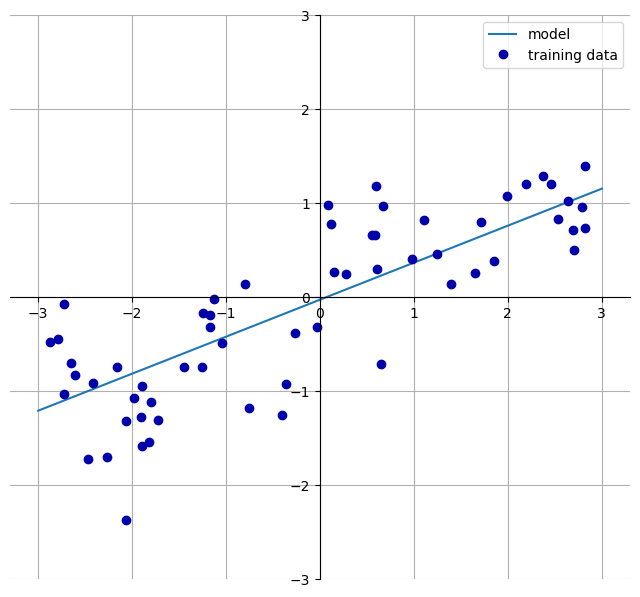

In [2]:
import mglearn
mglearn.plots.plot_linear_regression_wave() # 1차원 데이터셋 wave


##### 2. 선형회귀모델(최소제곱법)

* 선형회귀(Linear Regression) or 최소제곱법(OLS Old Least Squares)은 가장 간단하고 오랜된 알고리즘이다.
* 선형회귀는 예측과 훈련세트에 타겟(정답, label, 종속변수, y^)사이의 `평균제곱오차(MSE, Mean Square Error)`를 최소화하는 파라미터 `w(기울기 slope, 가중치 weight)`와 `b(편향 bias, 절편 intercept)`를 구한다.
* `평균제곱오차`는 예측값과 타깃값의 차이를 제곱하여 합산후에 샘플의 갯수로 나눈 것이다.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}$$
$$RMSE = \frac{1}{n}\sqrt{\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}}$$

In [3]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # 훈련용과 검증용데이터를 자동으로 분할

In [4]:
# 1. 무작위로 임의의 데이터 생성하기
X, y = mglearn.datasets.make_wave(n_samples=100)
# print(X, y)

# 2. 훈련용과 검증용테이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 훈련용(75):검증용(25)

# 3. 기계학습(머신러닝)
lr = LinearRegression().fit(X_train, y_train)
# print(dir(lr))

# 4. 모델(결과)
print(f'lr.coef_(가중치 or 기울기) = {lr.coef_}')
print(f'lr.intercept_(bias or intercept) = {lr.intercept_}')

# y = wx + b
# y = 0.40443939*x + -0.022568028173365354

# 결과분석
# 기울기 파라미터(w)는 가중치 weight 또는 계수 coefficient라고 하며 coef_속성에 저장되고
# 편향(offset, bias) 또는 절편(intercept)파라미터 b는 intercept_속성에 저장된다.
# intercept_속성은 항상 실수값 한 개이지만 coef_속성은 각 입력특성에 하나씩 대응이 되는
# numpy배열이다. 
# wave데이터셋은 입력특성이 한 개이기 때문에 coef_속성도 하나의 값만 가지고 있다.

lr.coef_(가중치 or 기울기) = [0.40443939]
lr.intercept_(bias or intercept) = -0.022568028173365354


In [5]:
# 5. 평가(검증)
print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train)}')  # 훈련용의 MSE값 = R2값이라고 한다.
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test)}')    # 검증용의 MSE값 

# 결과분석
# R2값이 0.66인 것은 그리 좋지 않은 결과이다. 하지만 훈련용과 비슷한 것을 알수가 있다.
# 그래서 이 모델은 과소적합상태를 의미한다.

훈련용데이터셋의 점수 = 0.5932911361660249
검증용데이터셋의 점수 = 0.6599448011276341


In [6]:
# 1차원 데이타셋에서는 모델이 단순하기 떄문에 과적합화를 우려할 필요는 없미지만
# 특성이 많은 데이터셋에서는 선형모델의 성능이 매우 높아져서 과대적합이 될 가능성이 매우 높다.
# 특성이 많은 보스톤주택가격데이터셋의 경우 506개의 샘플에 104개의 특성이 있다.
X, y = mglearn.datasets.load_extended_boston()    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
lr = LinearRegression().fit(X_train, y_train)

print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test):.2f}') 

# 결과분석
# 과거데이터는 94%의 예측률이지만 미래데이터는 78%의 예측률을 보인다.
# 과거데이터는 예측을 잘하지만 미래데이터는 예측을 잘하지 못하는 과대적합화 현상을 보인다.

훈련용데이터셋의 점수 = 0.94
검증용데이터셋의 점수 = 0.78


##### 3. 릿지(Ridge)회귀분석

* 릿지회귀분석도 회귀를 위한 선형모델이다.
* 하지만, 릿지회귀에서는 특성들이 가중치(기울기)에 주는 영향을 최소화 할 수 있게 하는데
* 이런 것을 규제(Regularization)이라고 한다.
* 규제란? 기계학습모델이 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.
* 규제는 L1규제와 L2규제방법이 있는데 `릿지회귀에서는 L2규제`를 사용한다.

In [7]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
ridge = Ridge().fit(X_train, y_train)
# print(dir(ridge))

print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}') 

# 결과분석
# 훈련세트에서는 LR보다 예측률이 낮지만 검증세트에서는 점수가 높다.
# 즉, 과대적합이 발생할 가능성이 적어진다.

훈련용데이터셋의 점수 = 0.87
검증용데이터셋의 점수 = 0.81


In [8]:
# 규제는 Ridge모델의 alpha라는 옵션이 있는데 이 알파값(Reqularization Strength)이 과대적합이 발생
# 되지 않도록 조정하는 값이다. 기본값은 1이다.
# 알파값을 높이면 예측률이 낮아지고 낮추면 예측율이 높아기게 된다. 즉, 알파값을 줄이면 제약이 약해진다.

for i in range(10, 1, -2):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    print(f'{i} 훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
    print(f'{i} 검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}') 
    print()

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}')    

# 결과분석
# 예측율만 보면 알파값 0.1에서 좋은 예측율을 나타내는 것을 볼 수가 있다.
# 알파값은 정해진 것이 아니라 여러번 훈련을 시켜서 얻은 모델을 선택은 시행착오를 거쳐야 한다. 

10 훈련용데이터셋의 점수 = 0.77
10 검증용데이터셋의 점수 = 0.73

8 훈련용데이터셋의 점수 = 0.78
8 검증용데이터셋의 점수 = 0.74

6 훈련용데이터셋의 점수 = 0.79
6 검증용데이터셋의 점수 = 0.75

4 훈련용데이터셋의 점수 = 0.81
4 검증용데이터셋의 점수 = 0.77

2 훈련용데이터셋의 점수 = 0.84
2 검증용데이터셋의 점수 = 0.80

훈련용데이터셋의 점수 = 0.92
검증용데이터셋의 점수 = 0.82


##### 4. 라쏘(Lasso)회귀분석

* 선형회귀에 규제를 적용하는데 있어 Ridge 규제를 보완한 회귀분석
* Ridge는 특성 즉 독립변수를 전체를 사용하는데 비해 Lasso는 특성치를 일부분 선택해서 사용한다.

In [9]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

# 결과분석
# 훈련, 검증용 모두 결과과 좋지 않다. 즉, 과소적합이 나타난다.
# 원인은 104개의 특성중에서 3갸먼 사용한 것을 알수가 있다.

훈련용데이터셋의 점수 = 0.27
검증용데이터셋의 점수 = 0.26
Lasso에서 사용된 특성의 갯수 = 3


In [10]:
# Lasso에서 과소적합을 줄이기 위해 alpha값을 줄여보기
# max_iter옵션 - 반복실행하는 최대횟수
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

훈련용데이터셋의 점수 = 0.89
검증용데이터셋의 점수 = 0.80
Lasso에서 사용된 특성의 갯수 = 34


In [11]:
lasso = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

훈련용데이터셋의 점수 = 0.93
검증용데이터셋의 점수 = 0.82
Lasso에서 사용된 특성의 갯수 = 73


##### 회귀분석실습

In [2]:
import statsmodels.api as sm
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

###### 1. 전기소량예측
* 회귀분석 : 전기소비량과 생산량의 상관관계를 분석
* 귀무가설 : 전기생산량과 소비량의 상관관계가 없다.(H0)
* 대립가설 : 전기생산량과 소비량의 상관관계가 있다.

In [14]:
# 월별 전기생산금액(단위 : 억원)
x = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
# 월별 전기사용량(단위 : 백만kwh)
y = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

# 회귀분석 : 선형회귀석함수 stats.linregress
# slope(기울기, 가중치), intercept(bias, 편향, 절편), rvalue(r2값)
# pvalue(예측불확실의 정도) - 0.05이하(=95%이상)일때 통계적으로 유의(미)하다.
result = stats.linregress(x, y)
print(result)

# 결과분석
# p-value(person value) - 9.238421943157891e-05 < 0.05 작다
# 95% 신뢰하에, 엄밀히 이야기 해서 99% 신뢰하 통계적으로 유의하다.
# rvalue=0.8929235125385305 : 89%만큼의 설명력(예측력)이 있다.

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)


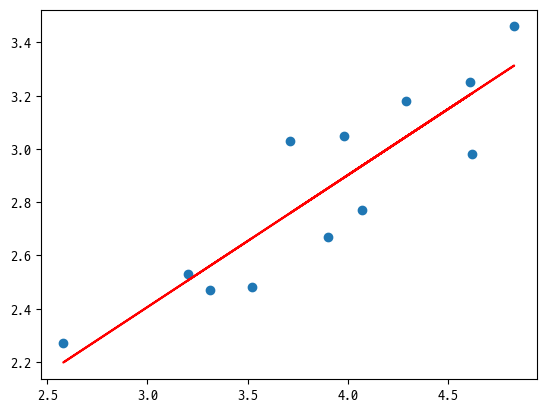

In [15]:
# 선형회귀분석 시각화
slope, intercept, rvalue, pvalue, stderr = result

# 회귀선그리기
# 예측전기소비량 = 기울기(slope) * x + 편향(intercept)
x1 = np.array(x) # 리스트자료형인 독립변수 x를 ndarray로 형변환
y1 = slope * x1 + intercept # y = ax + b

plt.scatter(x, y)  # 독립변수의 산점도
plt.plot(x1, y1, c='red')
plt.show()

In [16]:
# 전기소비량 예측
f = 5
lm_result = slope * f + intercept
print(f'전기생산량이 {f}일 때전기소비량 예측 = {lm_result}')

전기생산량이 5일 때전기소비량 예측 = 3.3975976081603942


#### 분류선형모델

* 종속변수가 이산형(분류형)일 경우에 사용되는 회귀분석방법이 `로지스틱회귀분석(Logistic Regresstion)` 이 있다.
* 로지스틱회귀분석은 선형이 아니라 분류알고리즘이다. 
* 로지스틱회귀분석의 `종속변수의 값은 2개분류일 때, 0과 1, 3개 이상일때는 0,1,2...`

###### 선형분류알고리즘
* 가장 대표적인 알고리즘 2개가 있다.
  1. 로지스틱회귀분석 Logistic Regression : 로지스틱은 회귀알고리즘이 아니라 분류
  1. 서버포트벡터머신 Support Vector Machine


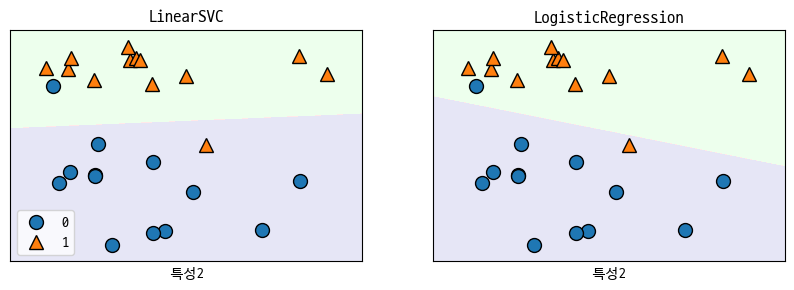

In [17]:
# forge데이터셋을 사용하여 LogisticRegression과 LinearSVC모델을 실습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
# print(type(X), len(X), type(y), len(y))
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill=False, eps=0.5
                                        , ax=ax, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('특성1')
    ax.set_xlabel('특성2')
    
axes[0].legend()
plt.show()

# 결과분석
# 두 개의 모델 각각 결정경계가 선형으로 표현되어 위쪽은 세모(1)로 분류,
# 아래쫃은 원(0)으로 분류 되었따.
# LinearSVC, LogisticRegression모델 각각 2개의 데이터를 잘못 분류되었다.
# 2개의 모델은 릿지와 마찬가지로 L2규제를 사용
# 규제강도를 결정하는 매개변수가 C이다. C값이 높아지면 가능한 최대로 분류
# 하기위해 노력한다.

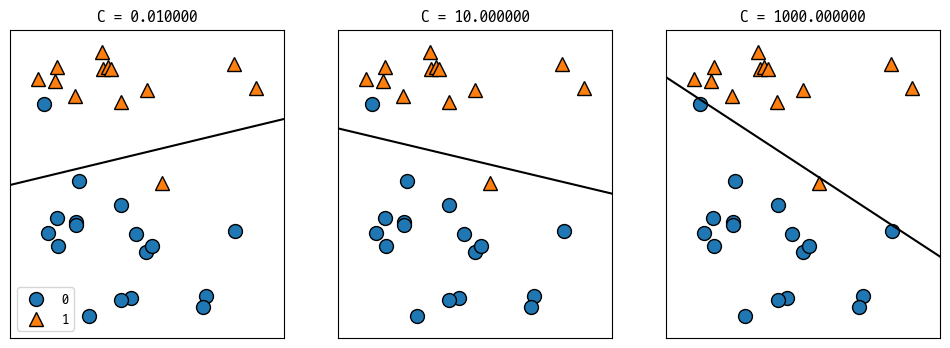

In [18]:
# C값조정
mglearn.plots.plot_linear_svc_regularization()

###### 실습. 유방암 데이터셋
* sklearn.datasets.load_breast_cancer()

In [19]:
from sklearn.datasets import load_breast_cancer
# malignant: 악성, benign: 양성
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [20]:
print(f'유방암데이터셋의 특성갯수 = {cancer.data[0].size}')
print(f'유방암데이터셋의 정답     = {np.unique(cancer.target)}')
print(cancer.DESCR)

유방암데이터셋의 특성갯수 = 30
유방암데이터셋의 정답     = [0 1]
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 fe

In [21]:
# LogisticRegression(C=1) 
logrea = LogisticRegression().fit(X_train, y_train)
print(f'훈련용 데이터셋의 점수 = {logrea.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 점수 = {logrea.score(X_test, y_test):.2f}')

훈련용 데이터셋의 점수 = 0.95
검증용 데이터셋의 점수 = 0.94


In [22]:
logrea = LogisticRegression(C=100).fit(X_train, y_train)
print(f'훈련용 데이터셋의 점수 = {logrea.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 점수 = {logrea.score(X_test, y_test):.2f}')

훈련용 데이터셋의 점수 = 0.94
검증용 데이터셋의 점수 = 0.97


In [23]:
logrea = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f'훈련용 데이터셋의 점수 = {logrea.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 점수 = {logrea.score(X_test, y_test):.2f}')

훈련용 데이터셋의 점수 = 0.93
검증용 데이터셋의 점수 = 0.93


#### 다중분류

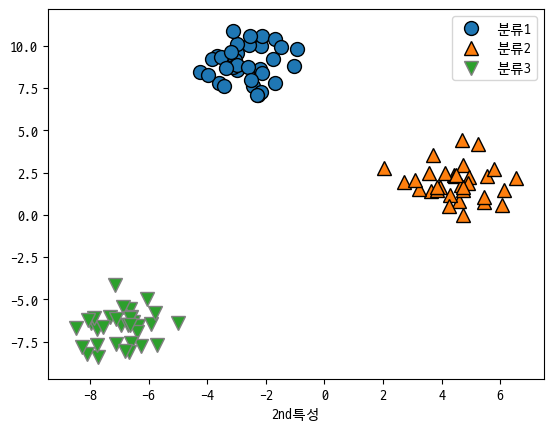

In [50]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42, n_samples=100)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('1st특성')
plt.xlabel('2nd특성')
plt.legend(['분류1', '분류2', '분류3'])
plt.show()

In [52]:
# SVM으로 분류 - LinearSVC
liner_svc = LinearSVC().fit(X, y)
# print(dir(liner_svc))
print(f'분류된 배열의 값 = {liner_svc.coef_}') 
print(f'분류된 편향의 값 = {liner_svc.intercept_}') 
print()

print(f'분류된 배열의 크기 = {liner_svc.coef_.shape}') 
print(f'분류된 편향의 크기 = {liner_svc.intercept_.shape}') 

분류된 배열의 값 = [[-0.17492341  0.23140974]
 [ 0.47621165 -0.06936637]
 [-0.18914316 -0.20399596]]
분류된 편향의 값 = [-1.07745167  0.13140347 -0.08604809]

분류된 배열의 크기 = (3, 2)
분류된 편향의 크기 = (3,)


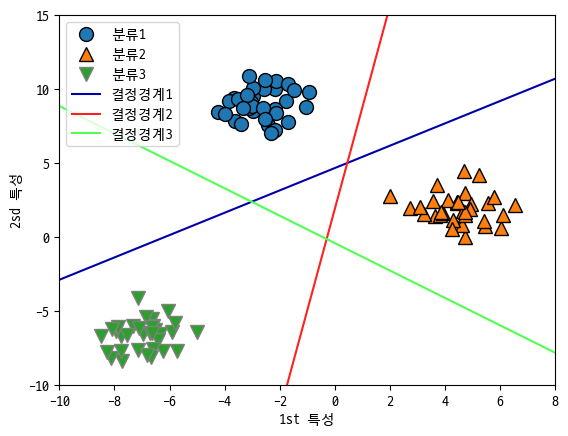

In [53]:
# 세개로 분류된 결과의 시각화
# LinearSVC모델이 결정경계를 3개로 나눈 것을 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], y)

line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svc.coef_, liner_svc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('1st 특성')
plt.ylabel('2sd 특성')
plt.legend(['분류1','분류2','분류3','결정경계1','결정경계2','결정경계3'])
plt.show()

##### iris 분류실습

In [54]:
from sklearn.datasets import load_iris
import seaborn as sns

In [56]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
print(iris.target, iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


In [88]:
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

# df.head()

# 샘플데이터를 추출
np.random.seed(42)
df.sample(frac=1).reset_index(drop=True).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor


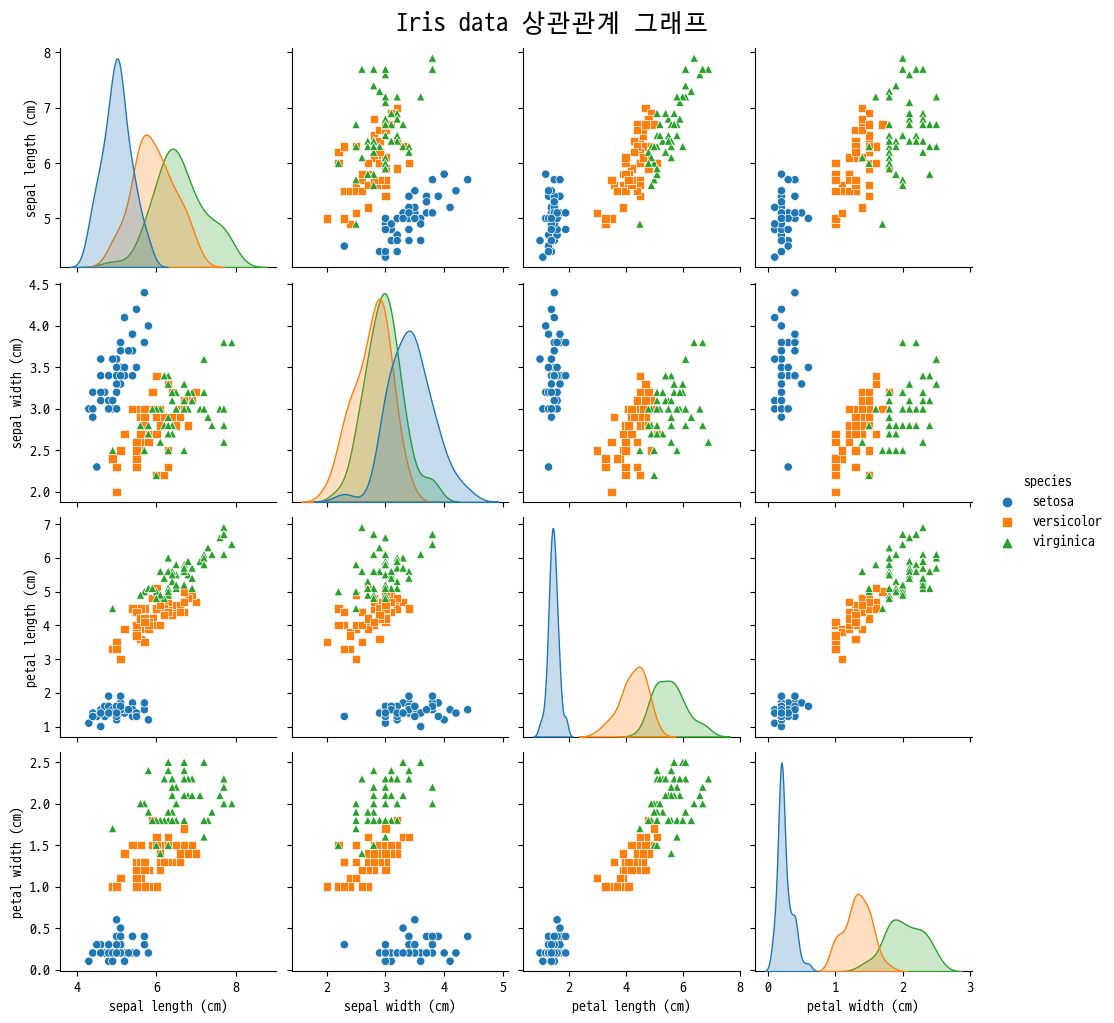

In [92]:
# 상관관계를 나타내는 pair scatter로 시각화
sns.pairplot(df, hue='species', markers=['o', 's', '^'])
plt.suptitle('Iris data 상관관계 그래프', y=1.02, fontsize=18)
plt.show()

###### 실습. 유방암데이터셋의 시각화(sns.pairplot)

In [93]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [94]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype='category')
df['class'] = sy.cat.rename_categories(cancer.target_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


In [96]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


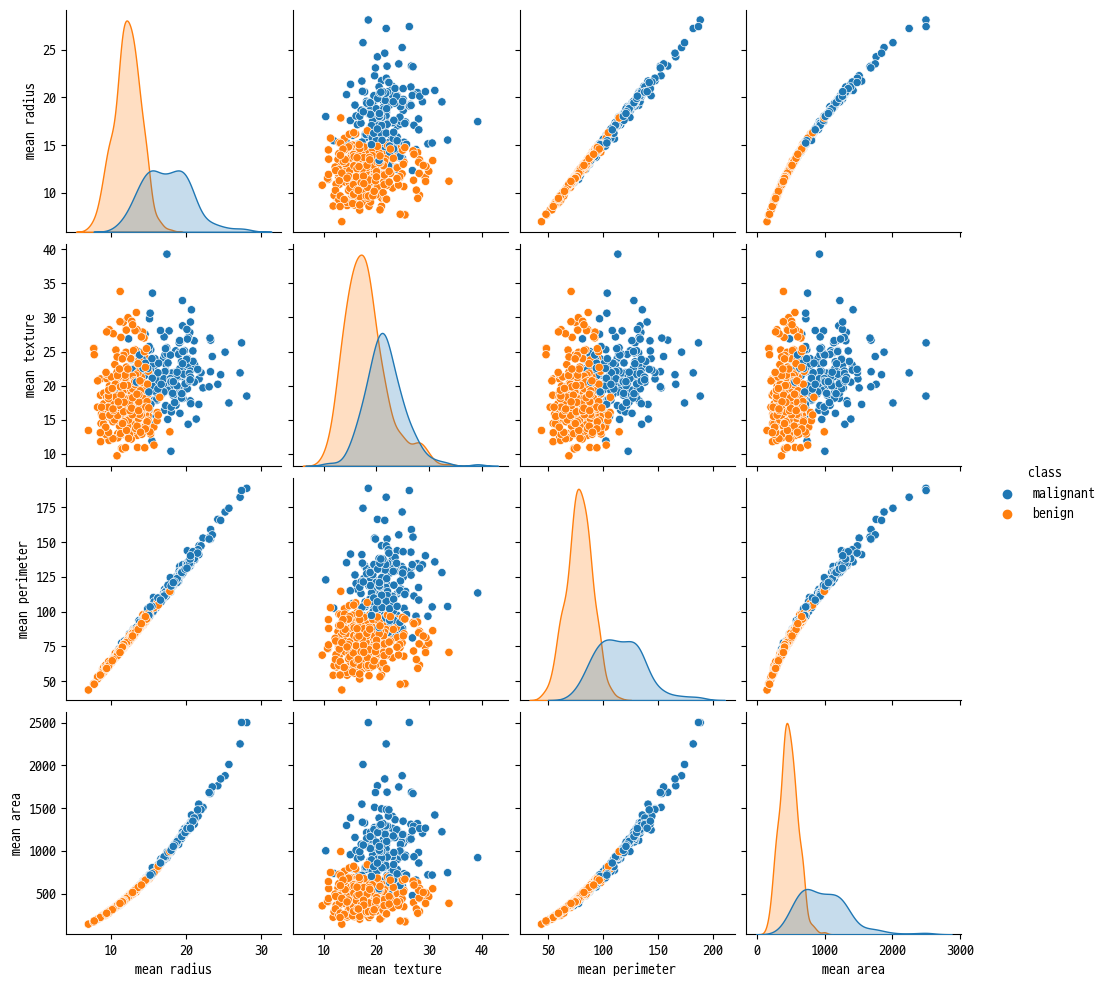

In [95]:
sns.pairplot(df[["mean radius", "mean texture", "mean perimeter", "mean area", "class"]], hue='class')
plt.show()

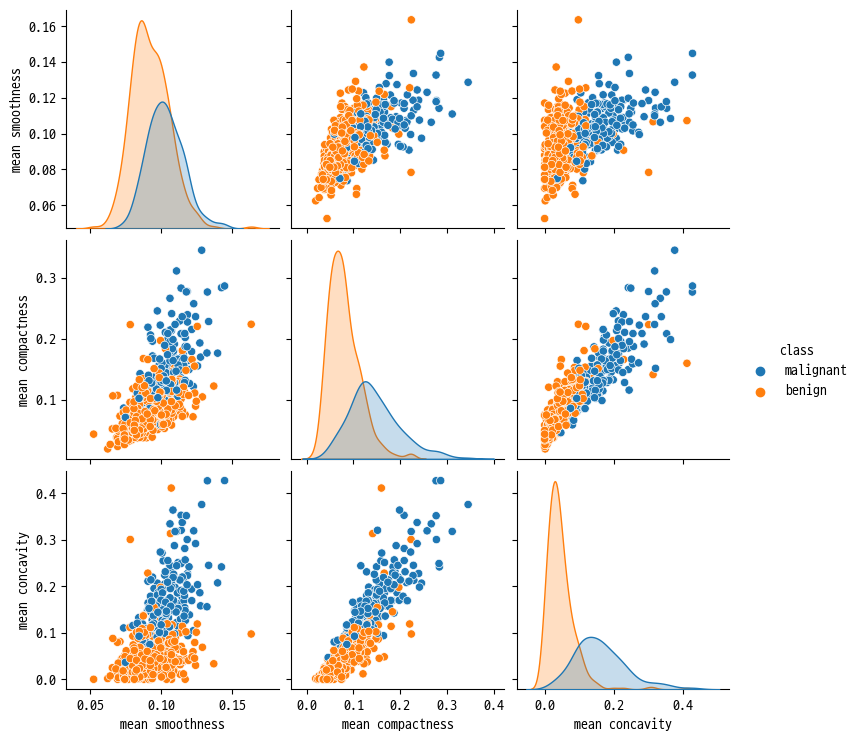

In [98]:
sns.pairplot(df[['mean smoothness', 'mean compactness', 'mean concavity', "class"]], hue='class')
plt.show()

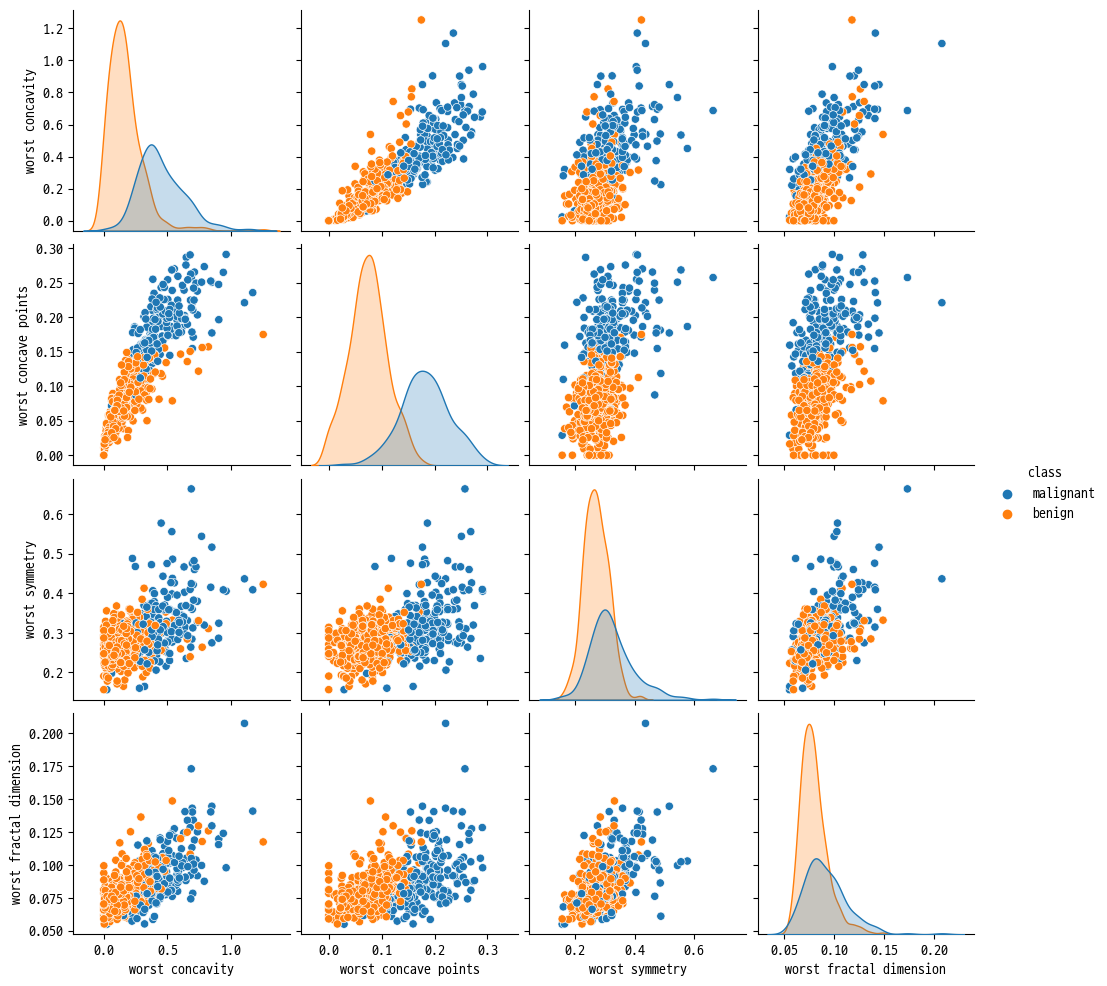

In [99]:
sns.pairplot(df[['worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', "class"]], hue='class')
plt.show()

##### 이미지데이터셋

1. 올리베티 얼굴 사진 데이터
1. 유명인 얼굴(LFW Labeled Faces in the Wild) 이미지 데이터

In [1]:
# 1. 올리베티얼굴이미지
from sklearn.datasets import fetch_olivetti_faces
olevetti = fetch_olivetti_faces()
print(olevetti.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\EZEN\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for 

In [79]:
def imgshow(N, M, img, cmap):
    fig = plt.figure(figsize=(8, 5))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    klist = np.random.choice(range(len(img.data)), N * M) # 10개의 이미지 무작위추출
    # print(klist)

    for i in range(N):
        for j in range(M):
            k = klist[i*M+j]
            # print(k)
            ax = fig.add_subplot(N, M, i*M+j+1) 
            # print(f'({N},{M},{i*M+j+1})') #251~2510
            ax.imshow(img.images[k], cmap=cmap)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            plt.title(img.target[k])

    plt.tight_layout()
    plt.show()

In [80]:
print(dir(plt.cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_LUTSIZE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_norm_from_scale', '_colormaps', '_ensure_cmap', '_gen_cmap_registry',

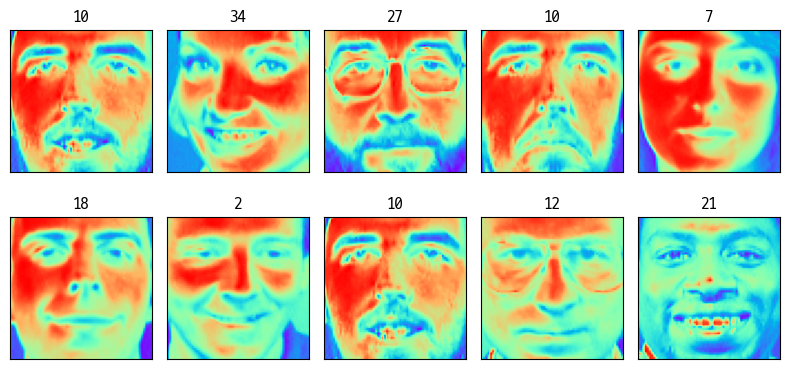

In [81]:
np.random.seed(42)
imgshow(2, 5, olevetti, plt.cm.rainbow)

In [82]:
from matplotlib import colormaps
print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_

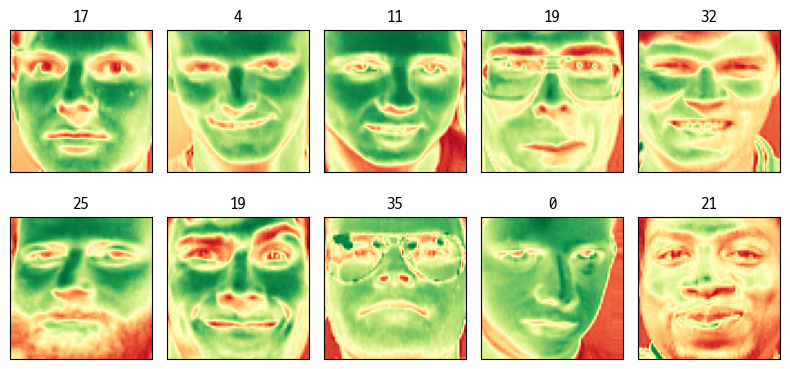

In [83]:
np.random.seed(0)
imgshow(2, 5, olevetti, 'RdYlGn')

In [84]:
# 2. LFW(유명인 얼굴)이미지
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

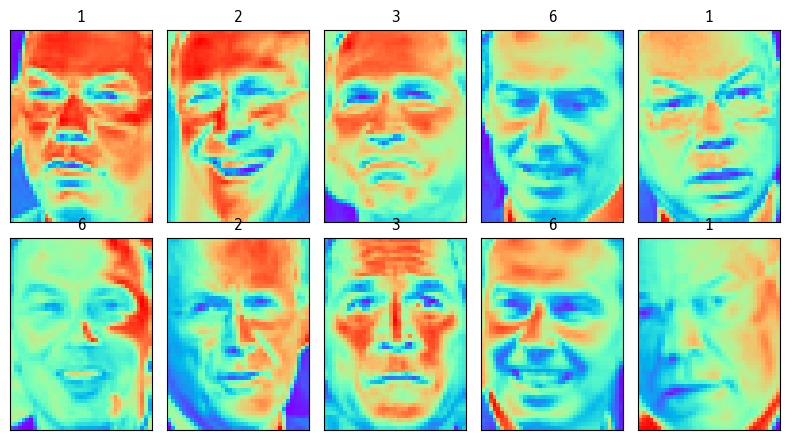

In [85]:
np.random.seed(42)
imgshow(2, 5, lfw_people, 'rainbow')

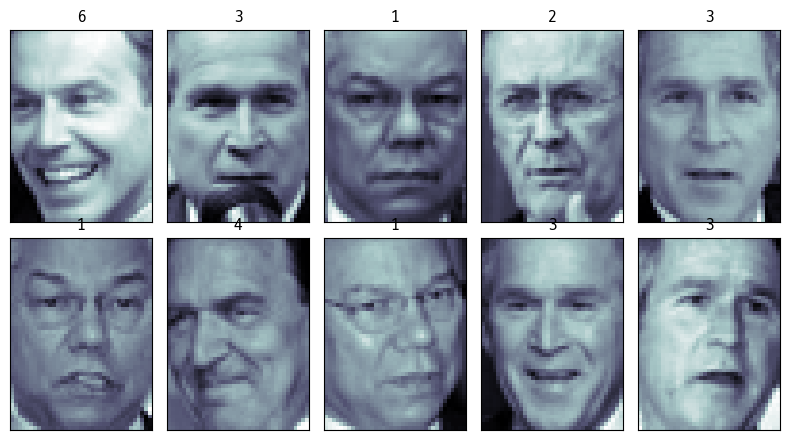

In [86]:
np.random.seed(0)
imgshow(2, 5, lfw_people, plt.cm.bone)

In [87]:
# 3. 숫자 손글씨이미지
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

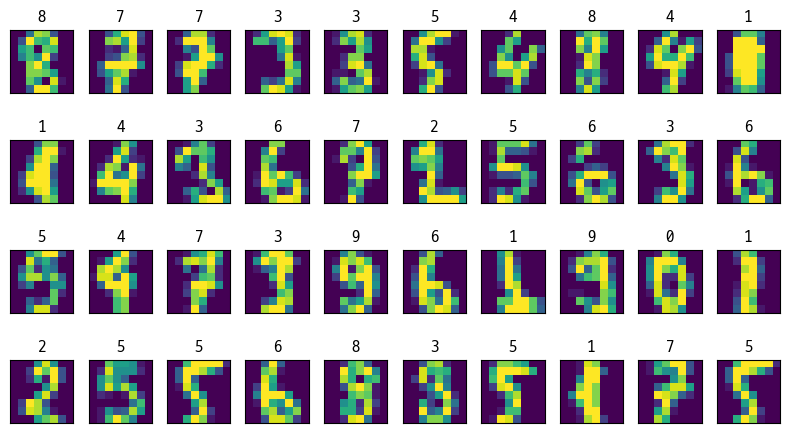

In [92]:
np.random.seed(0)
imgshow(4, 10, digits, None)